### Linear Regression Task
- 각 광고 종목에 투자했을 때, 수익이 얼만큼 발생하는지 회귀 예측 진행

In [1]:
import pandas as pd

# 데이터 호출
a_df = pd.read_csv('./datasets/advertising.csv')
a_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

#### 📊 데이터 확인

In [3]:
# 데이터 정보 확인
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### 📊 불필요 피처 제거

In [4]:
# 필요 없는 피처 삭제
pre_a_df = a_df.drop(labels=['Unnamed: 0'], axis=1)

#### 📊 데이터 결측치

In [5]:
# 결측치 확인
pre_a_df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### 📊 데이터 중복행

In [6]:
# 중복행 확인
pre_a_df.duplicated().sum()

0

#### 📊 상관관계

In [7]:
# 상관관계 확인
pre_a_df.corr()['Sales'].sort_values(ascending=False)[1:]

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

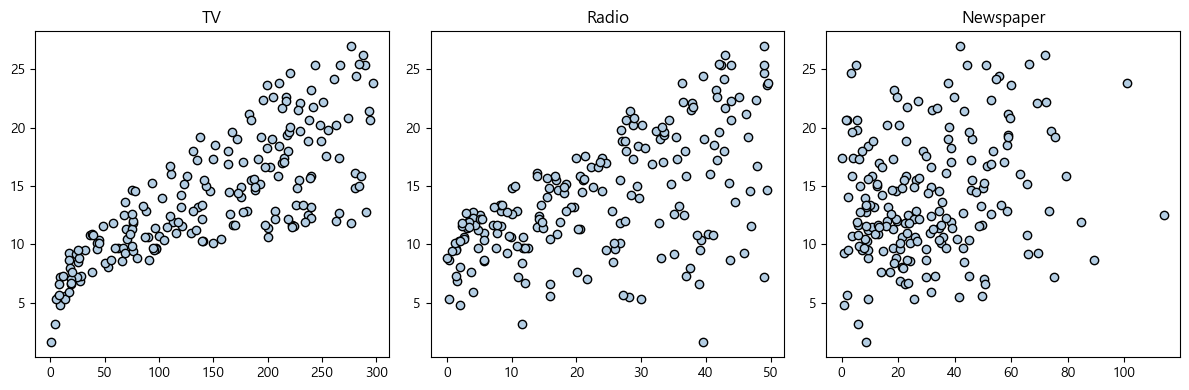

In [8]:
# 그래프 사이즈 설정
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 그래프 그리기
axes[0].scatter(pre_a_df['TV'], pre_a_df['Sales'], color=cmap(np.array([1])), edgecolor='black')
axes[0].set_title('TV')
axes[1].scatter(pre_a_df['Radio'], pre_a_df['Sales'], color=cmap(np.array([1])), edgecolor='black')
axes[1].set_title('Radio')
axes[2].scatter(pre_a_df['Newspaper'], pre_a_df['Sales'], color=cmap(np.array([1])), edgecolor='black')
axes[2].set_title('Newspaper')

plt.tight_layout()
plt.show()

#### 📊 일부 데이터 추출

In [9]:
# 상관관계가 높은 피처 가져오기
pre_a_df = pre_a_df[['TV', 'Sales']]
pre_a_df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


#### 📊 데이터 분포

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

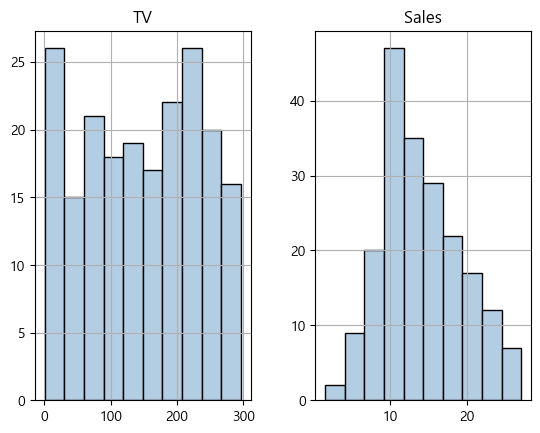

In [10]:
# 분포 확인
pre_a_df.hist(color=cmap(np.array([1])), edgecolor='black')

#### 📊 로그 변환

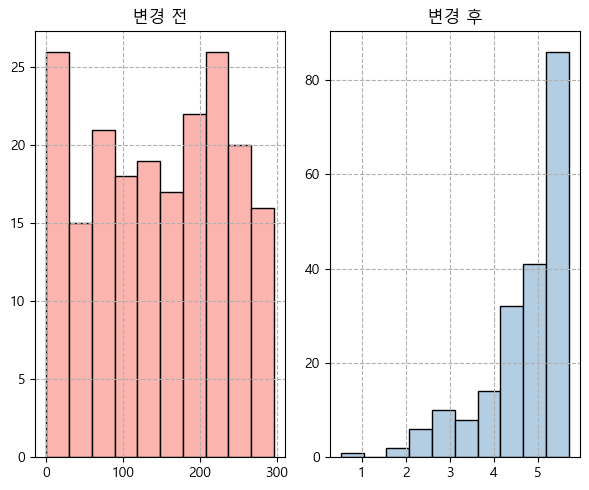

In [11]:
# 그래프 크기 설정
fig, axes = plt.subplots(1, 2, figsize=(6, 5))

# 그래프 그리기
axes[0].hist(pre_a_df.TV, color=cmap(np.array([0])), edgecolor='black')
axes[0].set_title('변경 전')
axes[0].grid(visible=True, linestyle='--')
axes[1].hist(np.log1p(pre_a_df.TV), color=cmap(np.array([1])), edgecolor='black')
axes[1].set_title('변경 후')
axes[1].grid(visible=True, linestyle='--')

plt.tight_layout()
plt.show()

# 로그 변환 확인 결과 분포 변화가 효과적이지 않기 때문에 로그 변환을 진행하지 않음

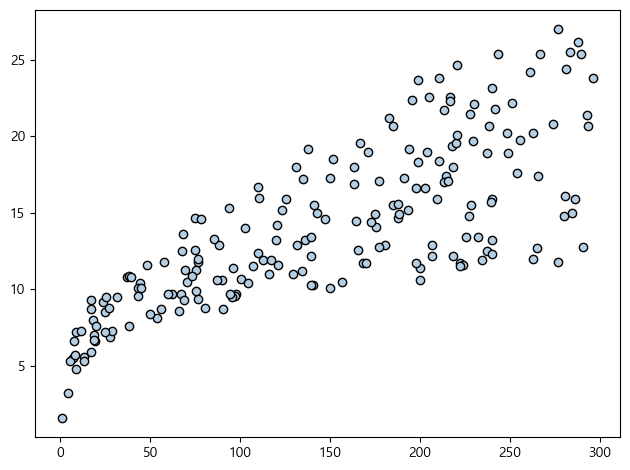

In [12]:
# 그래프 크기 설정
figsize=(12, 4)

# 상관관계 산점도 확인
plt.scatter(pre_a_df['TV'], pre_a_df['Sales'], color=cmap(np.array([1])), edgecolor='black')

plt.tight_layout()
plt.show()

#### 📊 PyTorch
- 직접 행렬 곱셈과 편향을 적용하여 선형 변환 수행

In [13]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Linear
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

In [14]:
# 랜덤 설정
torch.manual_seed(124)

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_a_df.TV, pre_a_df.Sales

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 텐서로 변경 (차원 조정)
X_train = torch.FloatTensor(X_train.values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 가중치 초기화
W = torch.zeros(1, requires_grad=True)
# 편향 초기화
b = torch.zeros(1, requires_grad=True)

# 경사 하강법 (최적화 알고리즘)
optimizer = SGD([W, b], lr=34533e-10)

# 반복 횟수
epochs = 100000

for epoch in range(1, epochs + 1):
    # 가설 선언
    H = W * X_train + b
    # 손실 함수
    loss = torch.mean((H - y_train) ** 2)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()
    # 손실 함수 미분 후 기울기 계산
    loss.backward()
    # W, b 업데이트
    optimizer.step()

    # 출
    if epoch % 1000 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W.item(), b.item(), loss.item()))

1000/100000: W: 0.0832, b: 0.0119, loss: 22.6895
2000/100000: W: 0.0831, b: 0.0233, loss: 22.6517
3000/100000: W: 0.0831, b: 0.0347, loss: 22.6141
4000/100000: W: 0.0830, b: 0.0460, loss: 22.5766
5000/100000: W: 0.0830, b: 0.0574, loss: 22.5392
6000/100000: W: 0.0829, b: 0.0688, loss: 22.5020
7000/100000: W: 0.0828, b: 0.0801, loss: 22.4648
8000/100000: W: 0.0828, b: 0.0914, loss: 22.4278
9000/100000: W: 0.0827, b: 0.1027, loss: 22.3909
10000/100000: W: 0.0827, b: 0.1139, loss: 22.3541
11000/100000: W: 0.0826, b: 0.1252, loss: 22.3175
12000/100000: W: 0.0826, b: 0.1364, loss: 22.2809
13000/100000: W: 0.0825, b: 0.1476, loss: 22.2445
14000/100000: W: 0.0824, b: 0.1588, loss: 22.2081
15000/100000: W: 0.0824, b: 0.1700, loss: 22.1719
16000/100000: W: 0.0823, b: 0.1812, loss: 22.1358
17000/100000: W: 0.0823, b: 0.1923, loss: 22.0999
18000/100000: W: 0.0822, b: 0.2035, loss: 22.0640
19000/100000: W: 0.0822, b: 0.2146, loss: 22.0282
20000/100000: W: 0.0821, b: 0.2257, loss: 21.9926
21000/100

In [15]:
# 예측 값
H = 0.0779 * X_test + 1.0584
# 손실 함수
loss = torch.mean((H - y_test) ** 2)

# 평균 제곱 오차(MSE)
print(loss.item())

19.847415924072266


#### 📊 PyTorch - Linear
- Linear 레이어를 통해 선형 모델 정의 및 선형 변환을 적용

In [16]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

# 랜덤 값 지정
torch.manual_seed(124)

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_a_df.TV, pre_a_df.Sales

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 텐서로 변경 (차원 조정)
X_train = torch.FloatTensor(X_train.values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 선형 회귀 모델
l_r = Linear(1, 1)

# 경사 하강법 (최적화 알고리즘)
optimizer = SGD(l_r.parameters(), lr=34533e-10)

# 반복 횟수
epochs = 100000

for epoch in range(1, epochs + 1):
    # 가설 선언
    H = l_r(X_train)
    # 손실 함수
    loss = mse_loss(H, y_train)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()
    # 손실 함수 미분 후 기울기 계산
    loss.backward()
    # W, b 업데이트
    optimizer.step()

    # 출력
    if epoch % 1000 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

1000/100000: W: 0.0818, b: 0.2772, loss: 21.8277
2000/100000: W: 0.0818, b: 0.2882, loss: 21.7927
3000/100000: W: 0.0817, b: 0.2992, loss: 21.7578
4000/100000: W: 0.0817, b: 0.3102, loss: 21.7230
5000/100000: W: 0.0816, b: 0.3211, loss: 21.6884
6000/100000: W: 0.0816, b: 0.3320, loss: 21.6538
7000/100000: W: 0.0815, b: 0.3429, loss: 21.6194
8000/100000: W: 0.0815, b: 0.3538, loss: 21.5850
9000/100000: W: 0.0814, b: 0.3647, loss: 21.5508
10000/100000: W: 0.0813, b: 0.3756, loss: 21.5167
11000/100000: W: 0.0813, b: 0.3864, loss: 21.4826
12000/100000: W: 0.0812, b: 0.3972, loss: 21.4487
13000/100000: W: 0.0812, b: 0.4080, loss: 21.4149
14000/100000: W: 0.0811, b: 0.4188, loss: 21.3812
15000/100000: W: 0.0811, b: 0.4296, loss: 21.3477
16000/100000: W: 0.0810, b: 0.4403, loss: 21.3142
17000/100000: W: 0.0810, b: 0.4511, loss: 21.2808
18000/100000: W: 0.0809, b: 0.4618, loss: 21.2475
19000/100000: W: 0.0809, b: 0.4725, loss: 21.2144
20000/100000: W: 0.0808, b: 0.4832, loss: 21.1813
21000/100

In [17]:
import numpy as np

# 예측 값
H = l_r(X_test)
# 손실 함수
loss = mse_loss(y_test, H)

# 평균 제곱 오차(MSE)
print(loss.item())
# np.sqrt(): 평균 제곱근 오차(RMSE) 계산
print(np.sqrt(loss.item()))

18.99808692932129
4.358679493759697


#### 📊 PyTorch - LinearRegressionModel

In [18]:
from torch.nn import Module, Linear

# class를 통해 선형 회귀 모델 정의
class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [19]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

# 랜덤 설정
torch.manual_seed(124)

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_a_df.TV, pre_a_df.Sales

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 텐서로 변경 (차원 조정)
X_train = torch.FloatTensor(X_train.values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 선형 회귀 모델
l_r = LinearRegressionModel()

# 경사 하강법 (최적화 알고리즘)
optimizer = SGD(l_r.parameters(), lr=34533e-10)

# 반복 횟수 지정
epochs = 100000

for epoch in range(1, epochs + 1):
    # 가설 선언
    H = l_r(X_train)
    
    # 손실 함수
    loss = mse_loss(H, y_train)
    
    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()
    
    # 손실 함수 미분 후 기울기 계산
    loss.backward()
    
    # W, b 업데이트
    optimizer.step()

    # 출력
    if epoch % 10000 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

10000/100000: W: 0.0813, b: 0.3756, loss: 21.5167
20000/100000: W: 0.0808, b: 0.4832, loss: 21.1813
30000/100000: W: 0.0803, b: 0.5891, loss: 20.8565
40000/100000: W: 0.0797, b: 0.6933, loss: 20.5418
50000/100000: W: 0.0792, b: 0.7959, loss: 20.2370
60000/100000: W: 0.0787, b: 0.8969, loss: 19.9417
70000/100000: W: 0.0782, b: 0.9963, loss: 19.6556
80000/100000: W: 0.0777, b: 1.0941, loss: 19.3784
90000/100000: W: 0.0772, b: 1.1903, loss: 19.1102
100000/100000: W: 0.0767, b: 1.2851, loss: 18.8501


In [20]:
import numpy as np

# 예측 값
H = l_r(X_test)
# 손실 함수
loss = mse_loss(y_test, H)

# 평균 제곱 오차(MSE)
print(loss.item())
# np.sqrt(): 평균 제곱근 오차(RMSE) 계산
print(np.sqrt(loss.item()))

18.99808692932129
4.358679493759697


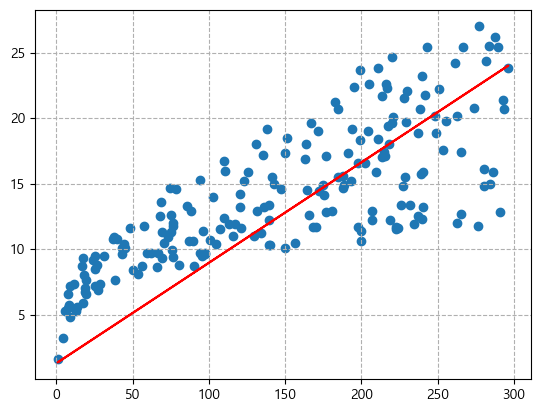

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터
plt.scatter(pre_a_df.TV, pre_a_df.Sales)
# 예측 값
plt.plot(pre_a_df.TV, 0.0767 * pre_a_df.TV + 1.2851, color="red")
# 그리드
plt.grid(visible=True, linestyle='--')

plt.show()

#### 📊 Sklearn - LinearRegression Task

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()

# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)
print('W: {:.4f}, b: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W: 0.0467, b: 7.2020


In [23]:
from sklearn.metrics import mean_squared_error

# 예측
prediction = l_r.predict(X_test)
# 예측 값
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'\
      .format(mean_squared_error(y_test, prediction), 
      np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 9.4174, RMSE loss: 3.0688


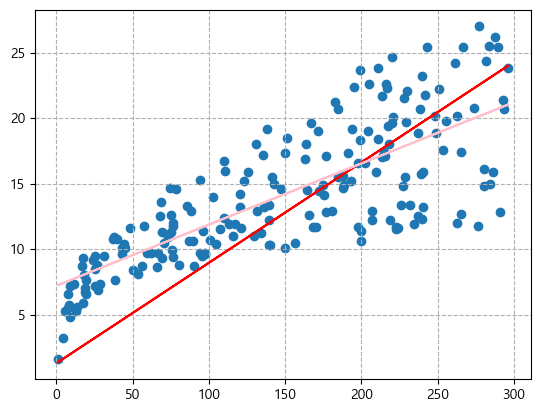

In [24]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터
plt.scatter(pre_a_df.TV, pre_a_df.Sales)
# 예측 값
plt.plot(pre_a_df.TV, 0.0767 * pre_a_df.TV + 1.2851, color="red")
plt.plot(pre_a_df.TV, 0.0467 * pre_a_df.TV + 7.2020, color="pink")
plt.grid(visible=True, linestyle='--')
plt.show()